In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation

from sklearn.preprocessing import LabelEncoder

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
import seaborn as sns

import sklearn
from pathlib import Path
from warnings import simplefilter
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#EDA

In [ ]:
filepath = '/content/drive/MyDrive/data/dataTS.csv'
df = pd.read_csv(filepath)
# Chuyển đổi chuỗi thời gian về dạng datetime
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Sử dụng hàm pd.date_range để tạo chuỗi thời gian
df['Time'] = pd.date_range(start = '2017-07-11 14:05:00	', periods=339396, freq='H')
df.set_index('Time', inplace = True)
df.head(10)

,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP
Time,,,,,,,,,,
2017-07-11 14:05:00,7.29,1000.0,0.01,37.72,2.382600,118.301766,20.640303,257.62,32.64,28.204791
2017-07-11 15:05:00,7.29,1000.0,0.01,37.18,7.284571,23.182876,14.900992,260.50,32.56,22.112042
2017-07-11 16:05:00,7.29,1000.0,0.01,36.64,4.668972,11.363099,21.685466,255.54,32.54,33.116497
2017-07-11 17:05:00,7.30,1000.0,0.01,36.25,2.146710,83.474613,24.299291,255.06,32.47,27.300682
2017-07-11 18:05:00,7.31,1000.0,0.01,36.08,2.934312,12.725587,36.730378,258.62,32.42,33.866263
2017-07-11 19:05:00,7.31,1000.0,0.01,35.83,5.594663,79.639509,11.190794,260.10,32.42,38.535924
2017-07-11 20:05:00,7.31,1000.0,0.01,35.63,1.891900,92.438369,28.065020,258.92,32.42,24.901455
2017-07-11 21:05:00,7.31,1000.0,0.01,35.52,3.548026,26.135042,25.175644,255.42,32.35,26.988880
2017-07-11 22:05:00,7.31,1000.0,0.01,35.35,3.075528,130.620427,8.040837,252.52,32.30,29.320082


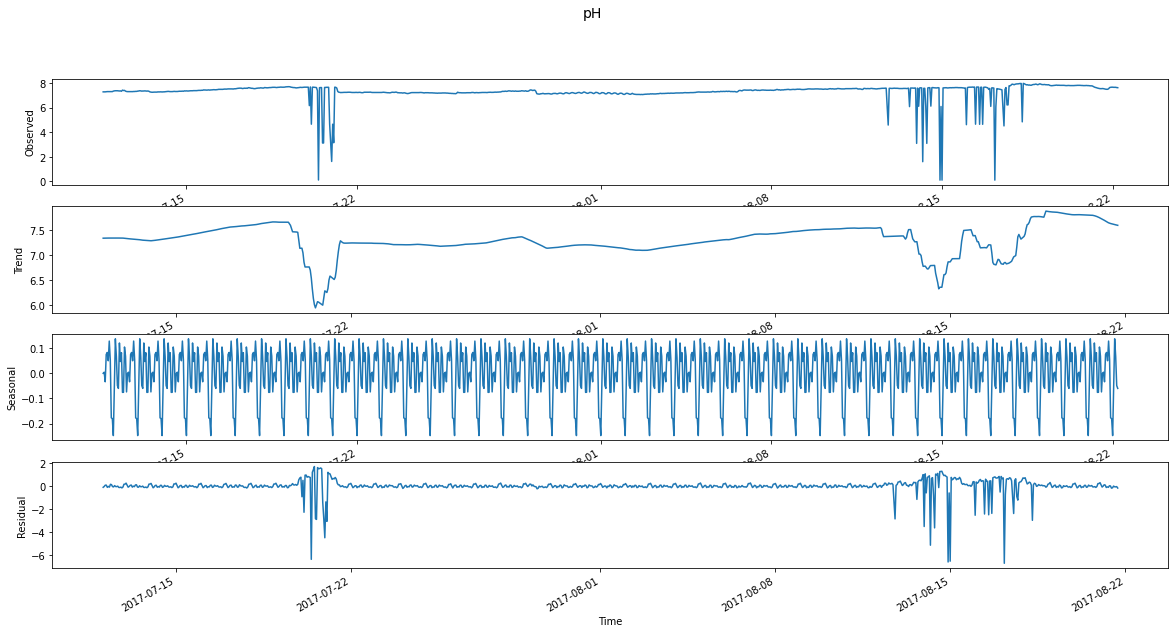

<Figure size 1440x720 with 0 Axes>

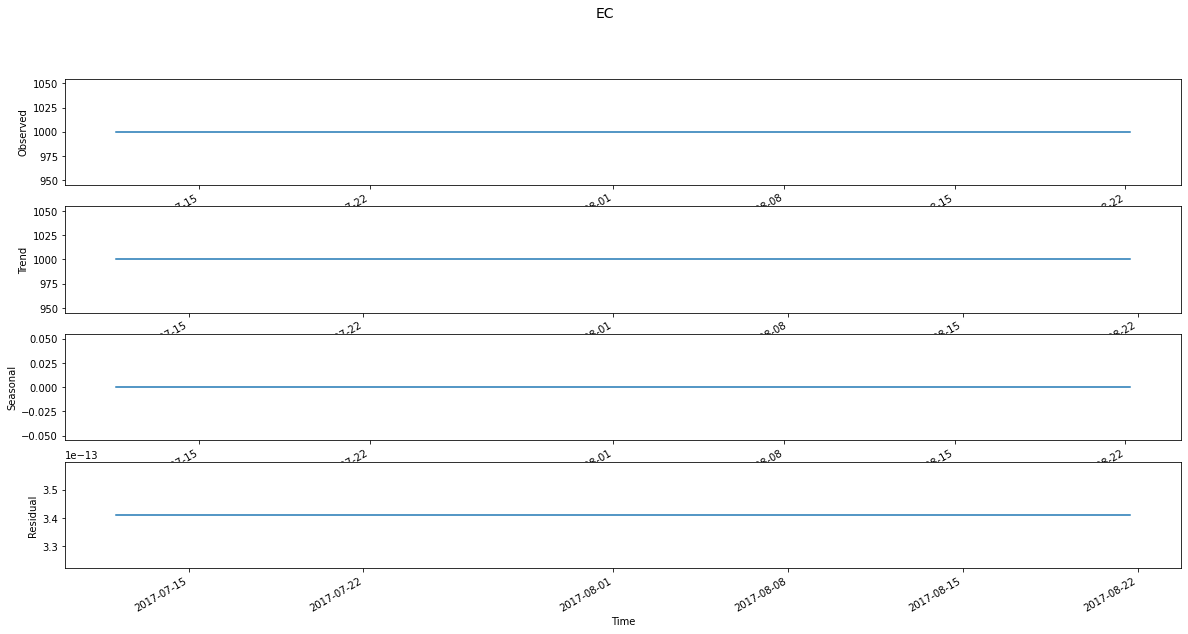

<Figure size 1440x720 with 0 Axes>

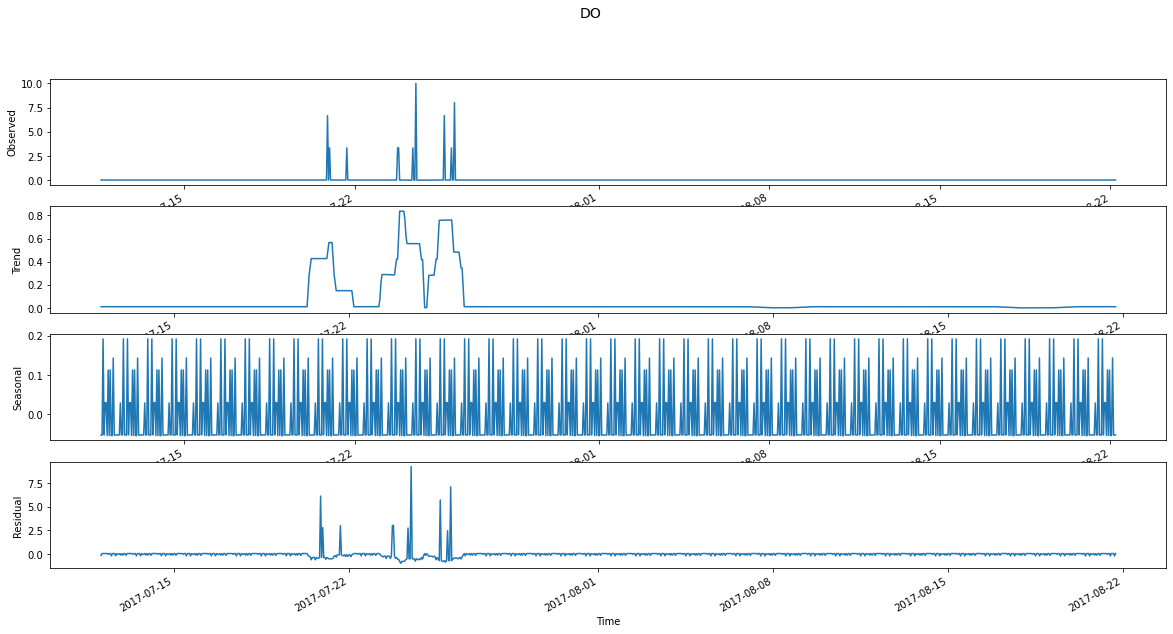

<Figure size 1440x720 with 0 Axes>

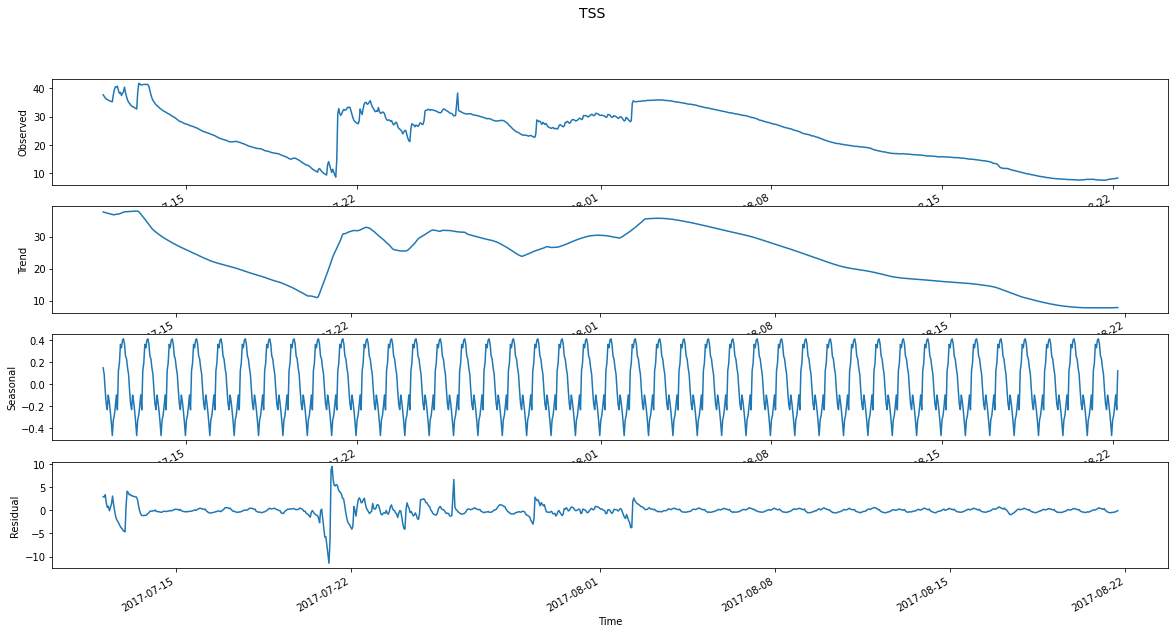

<Figure size 1440x720 with 0 Axes>

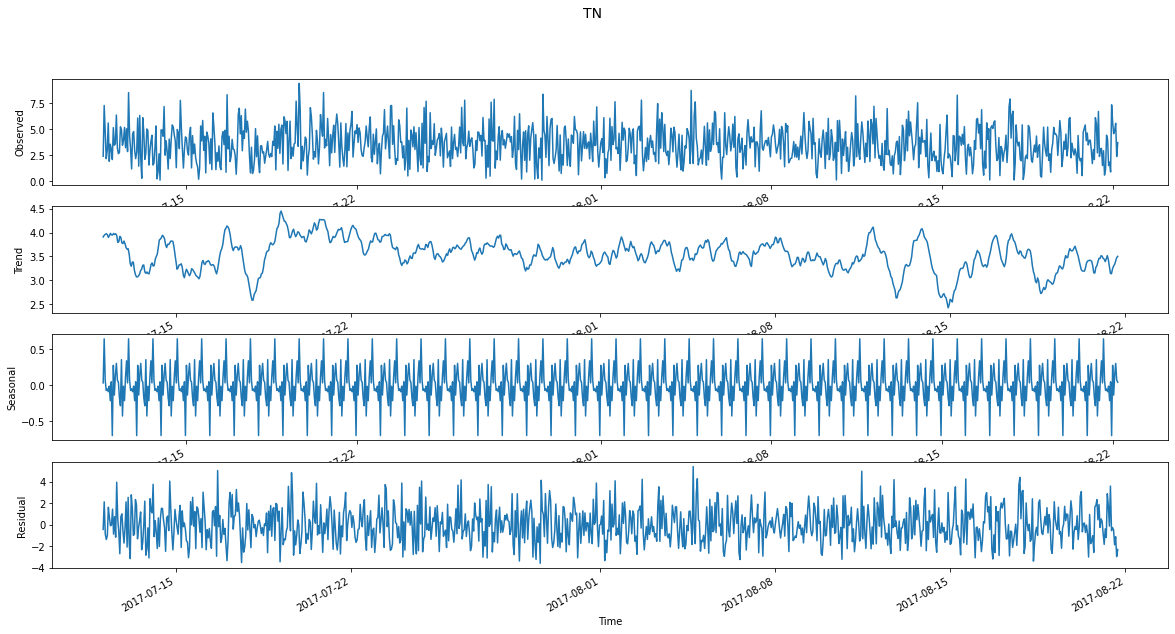

<Figure size 1440x720 with 0 Axes>

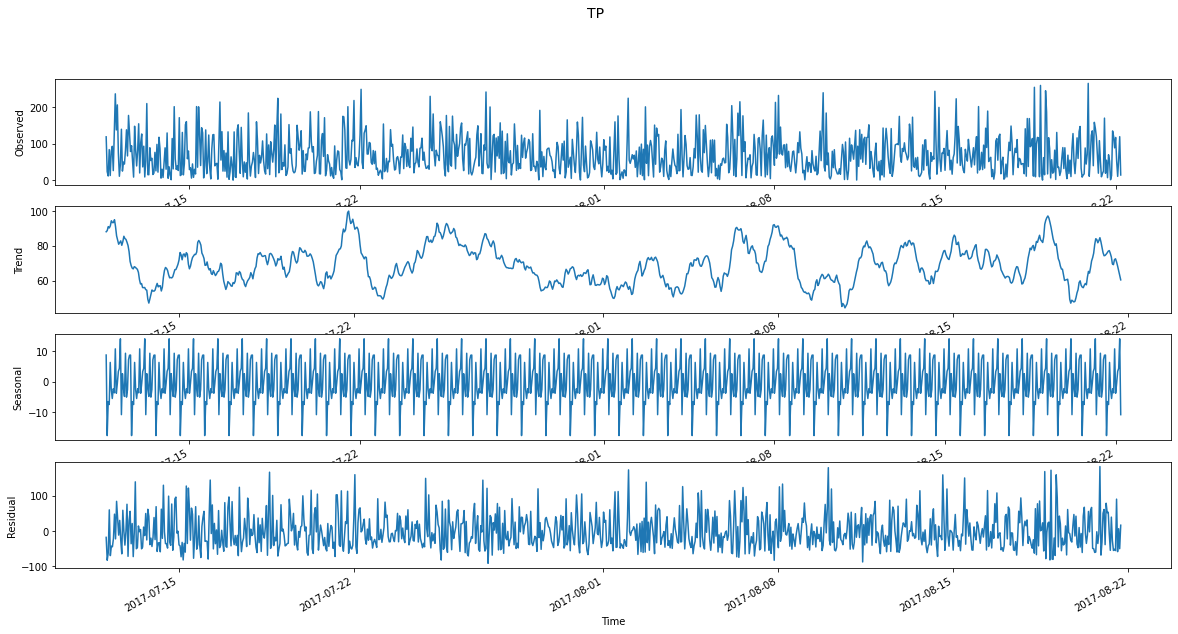

<Figure size 1440x720 with 0 Axes>

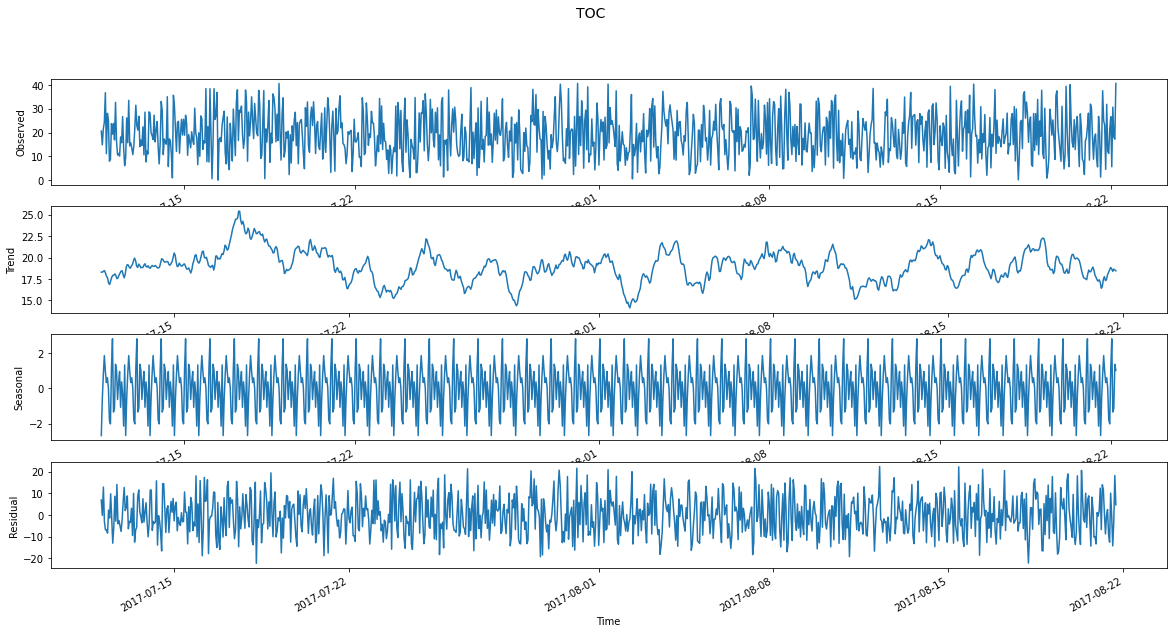

<Figure size 1440x720 with 0 Axes>

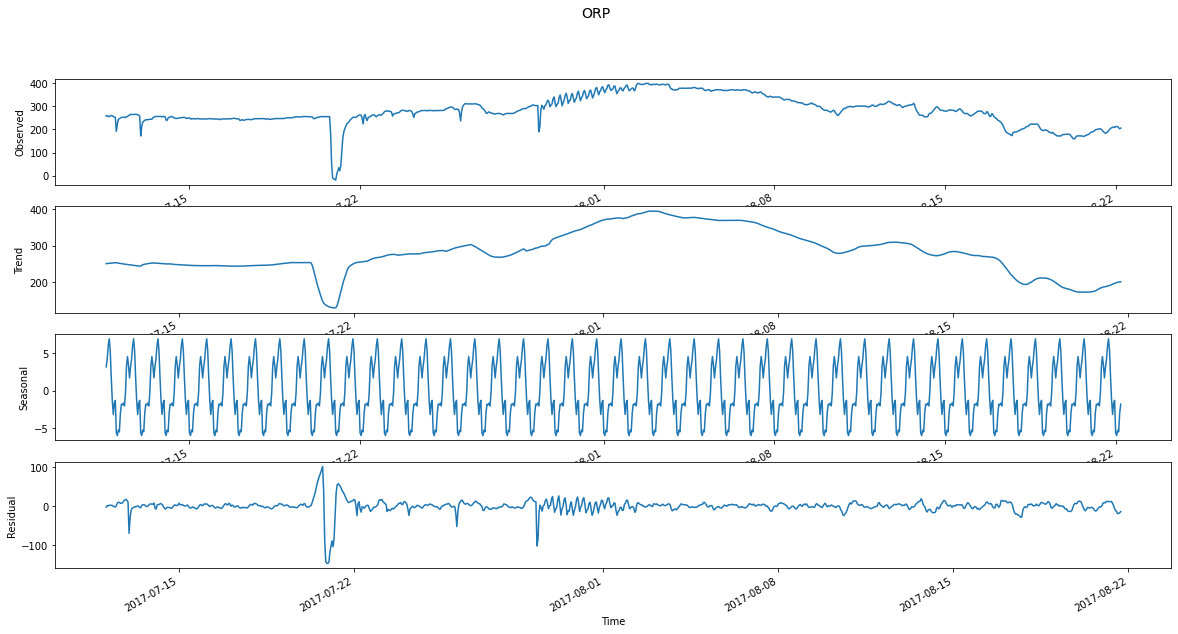

<Figure size 1440x720 with 0 Axes>

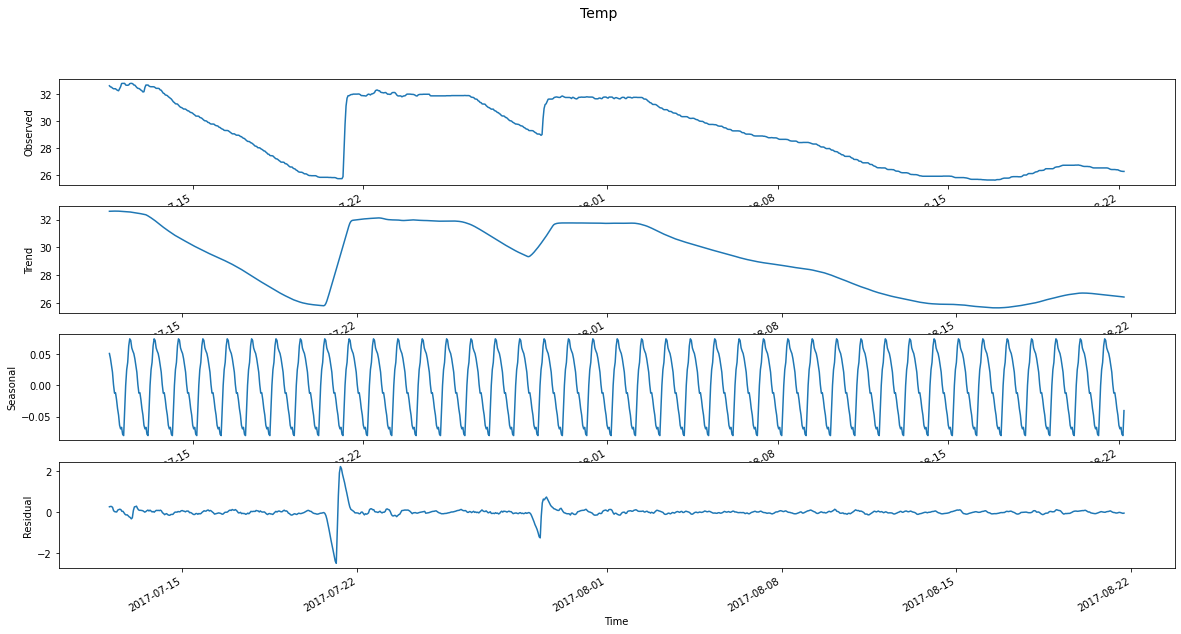

<Figure size 1440x720 with 0 Axes>

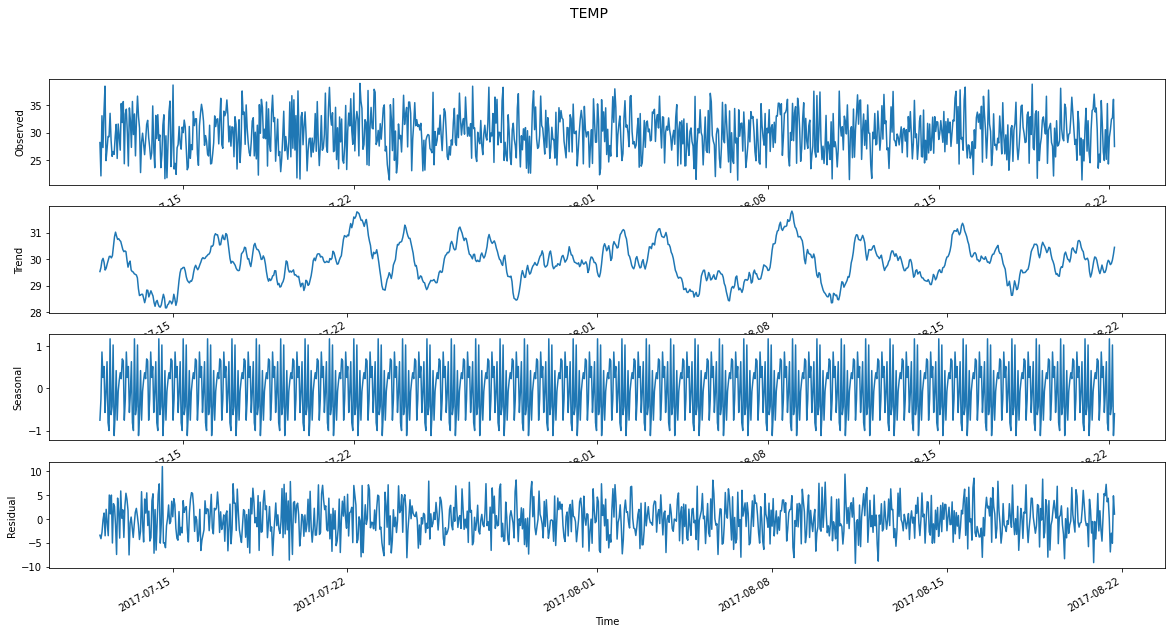

<Figure size 1440x720 with 0 Axes>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

for col in df.columns:
    result = seasonal_decompose(df[col][0:1000], model='additive')
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20,10))
    result.observed.plot(ax=ax1)
    ax1.set_ylabel('Observed')
    result.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')
    result.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')
    result.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')
    plt.suptitle(col, fontsize=14)
    fig = plt.figure(figsize=(20,10))
    plt.show()

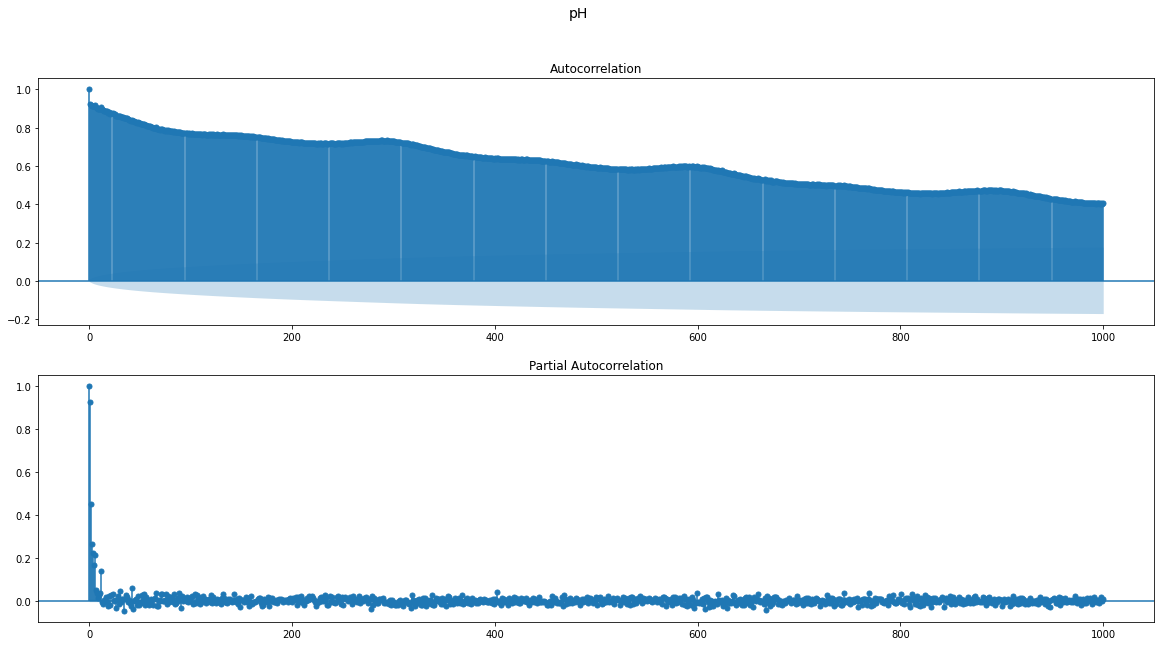

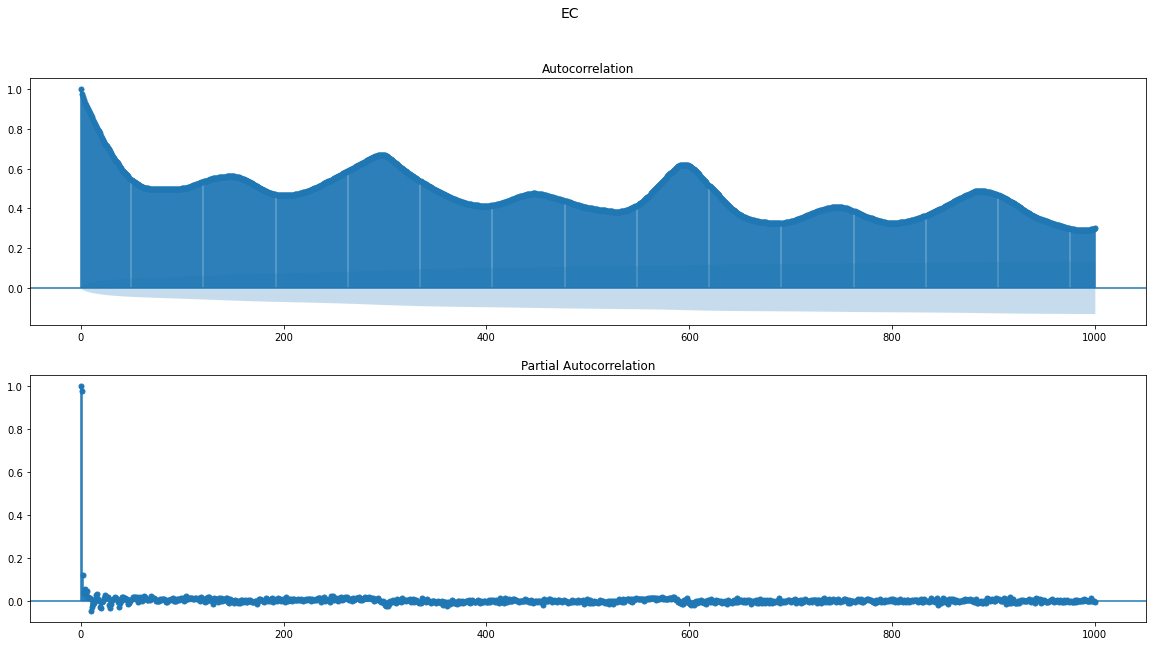

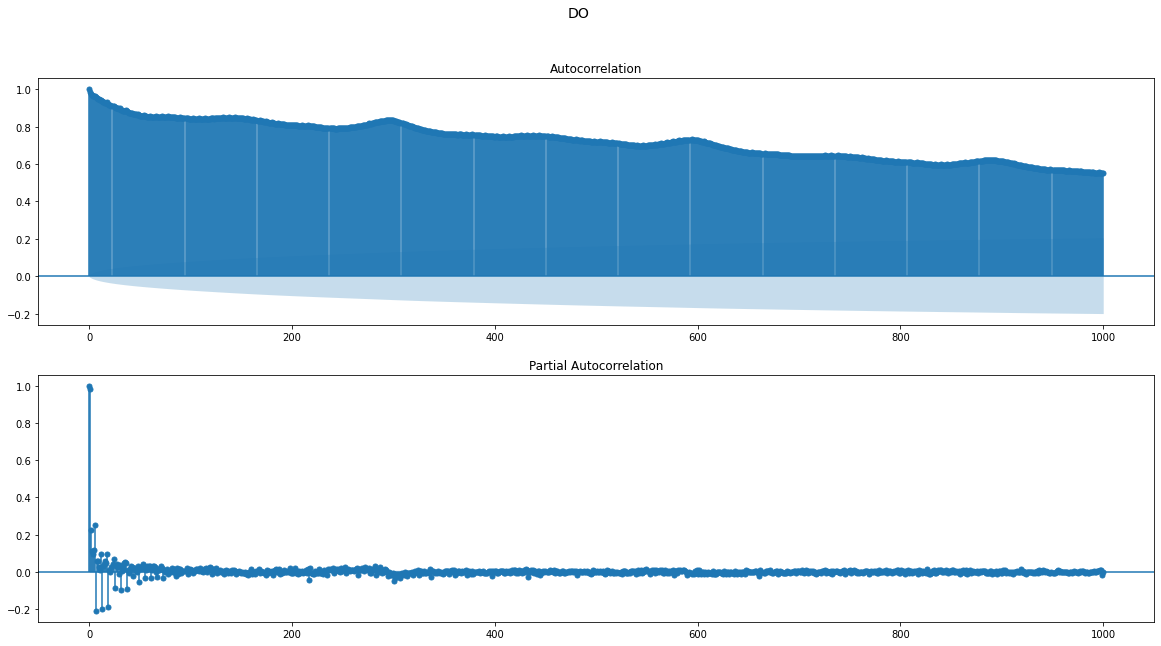

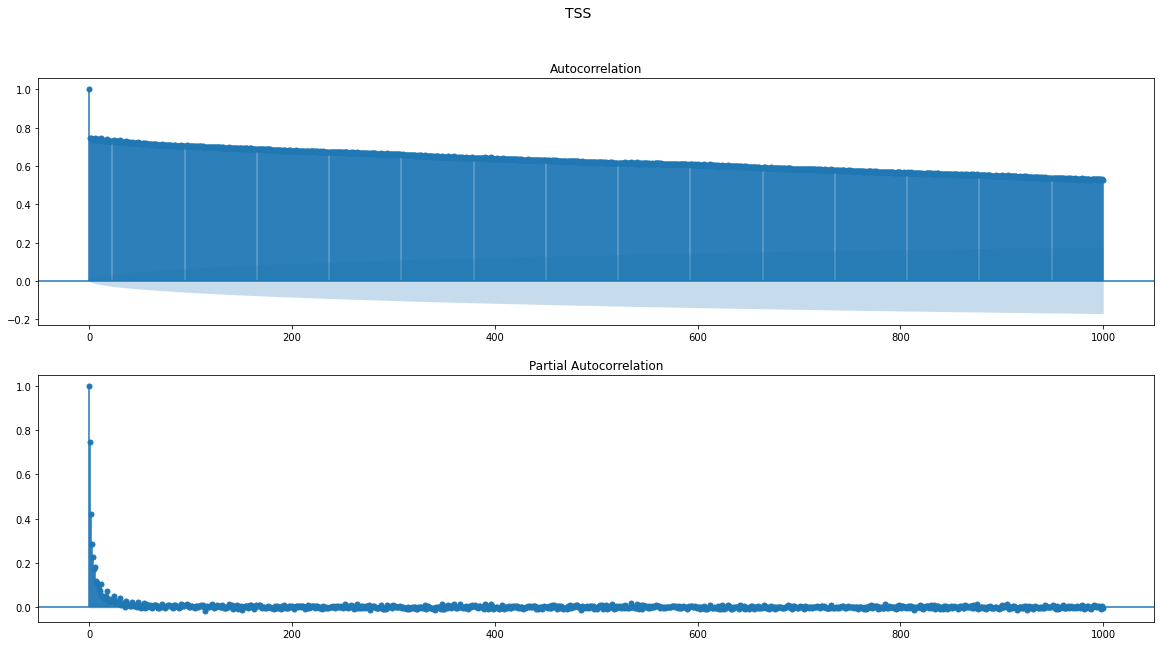

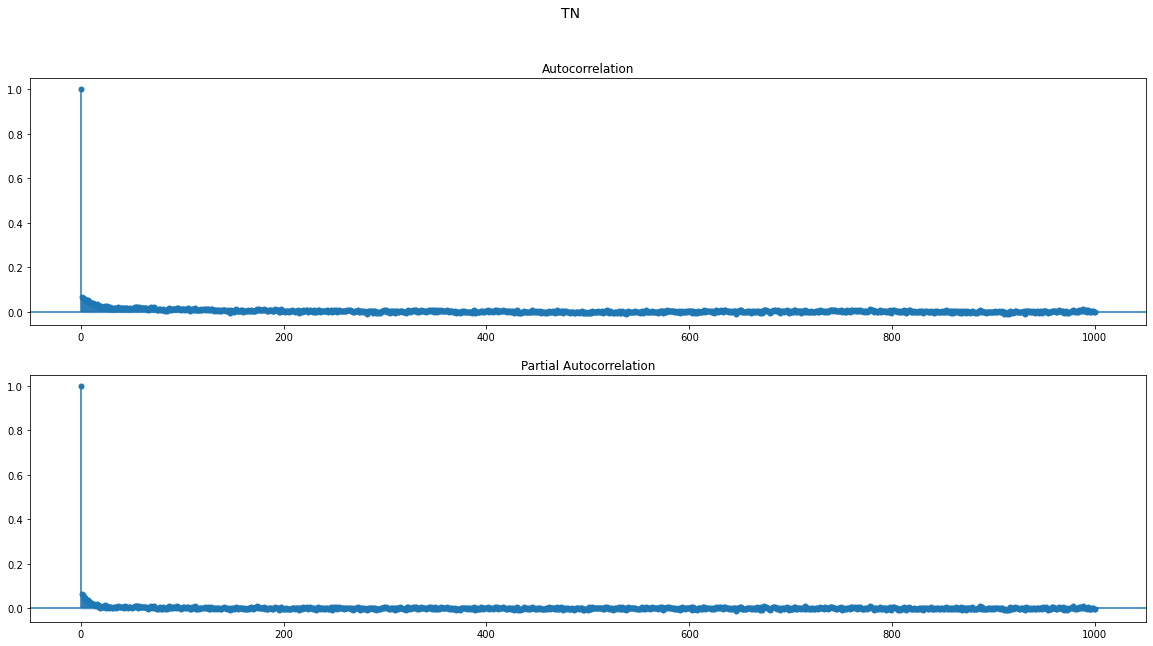

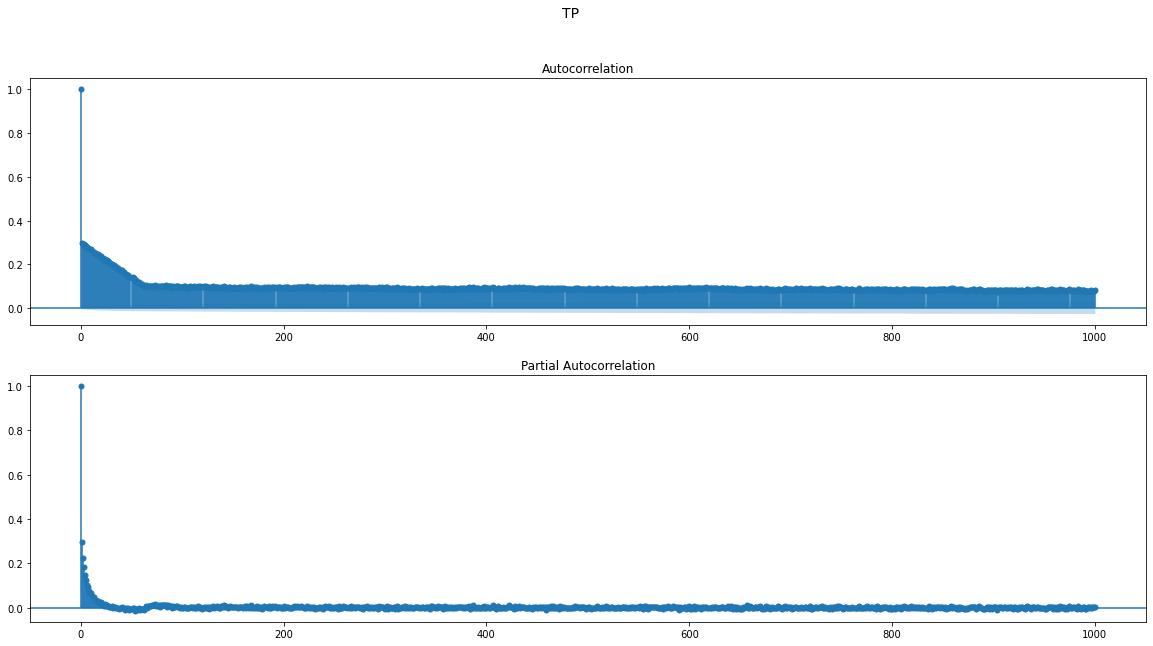

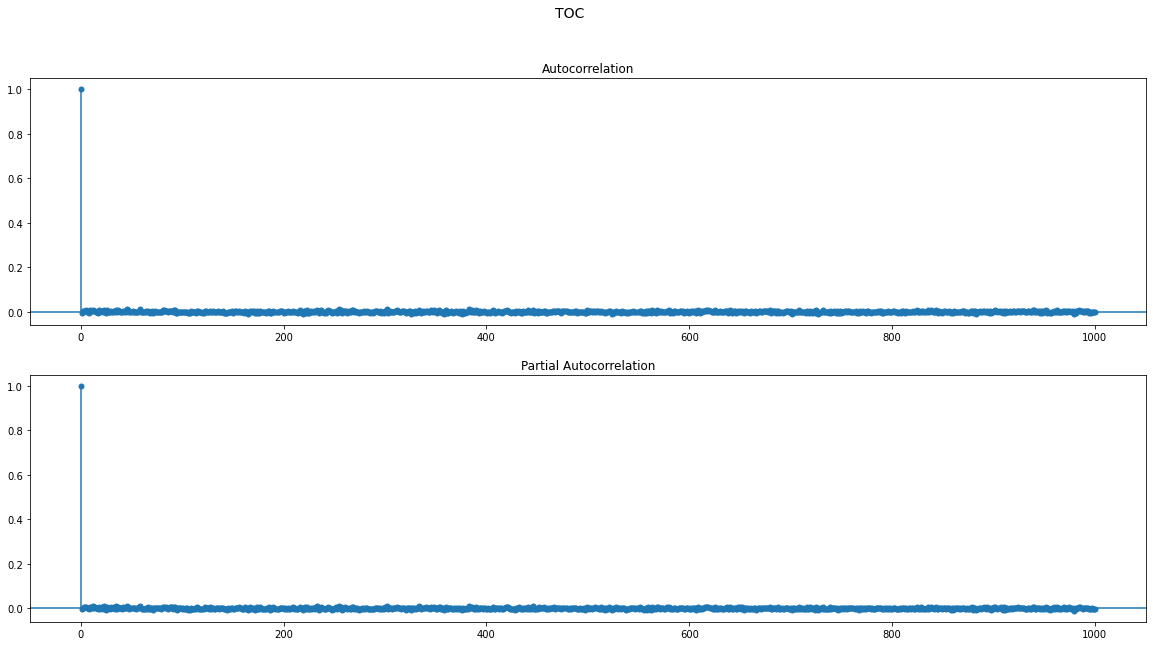

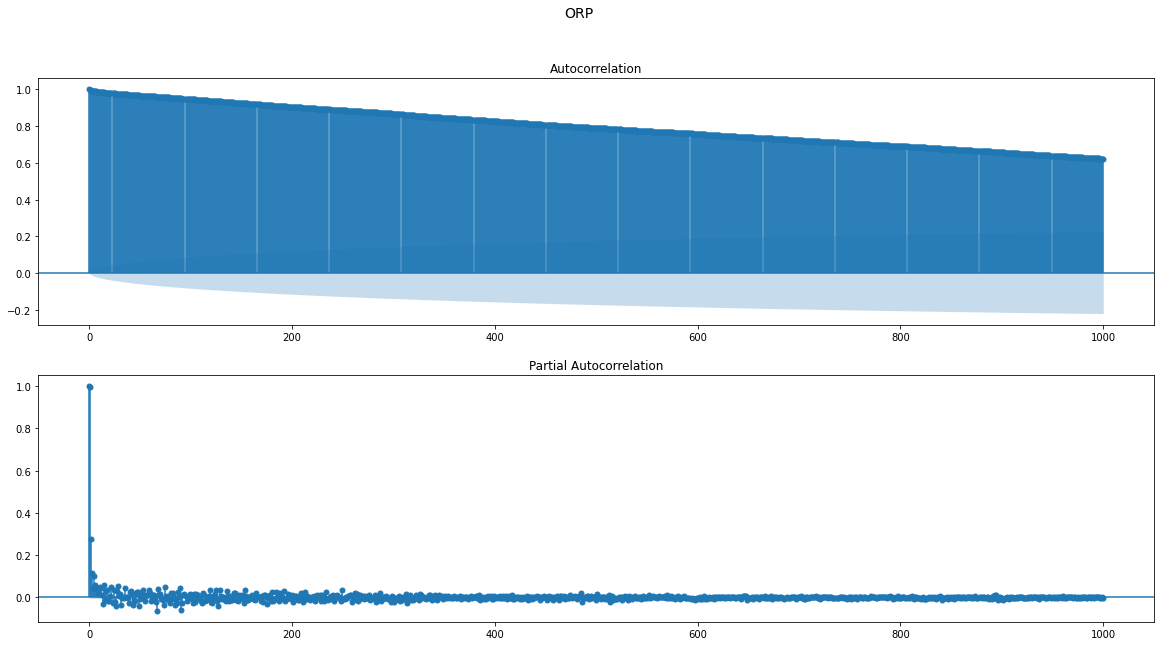

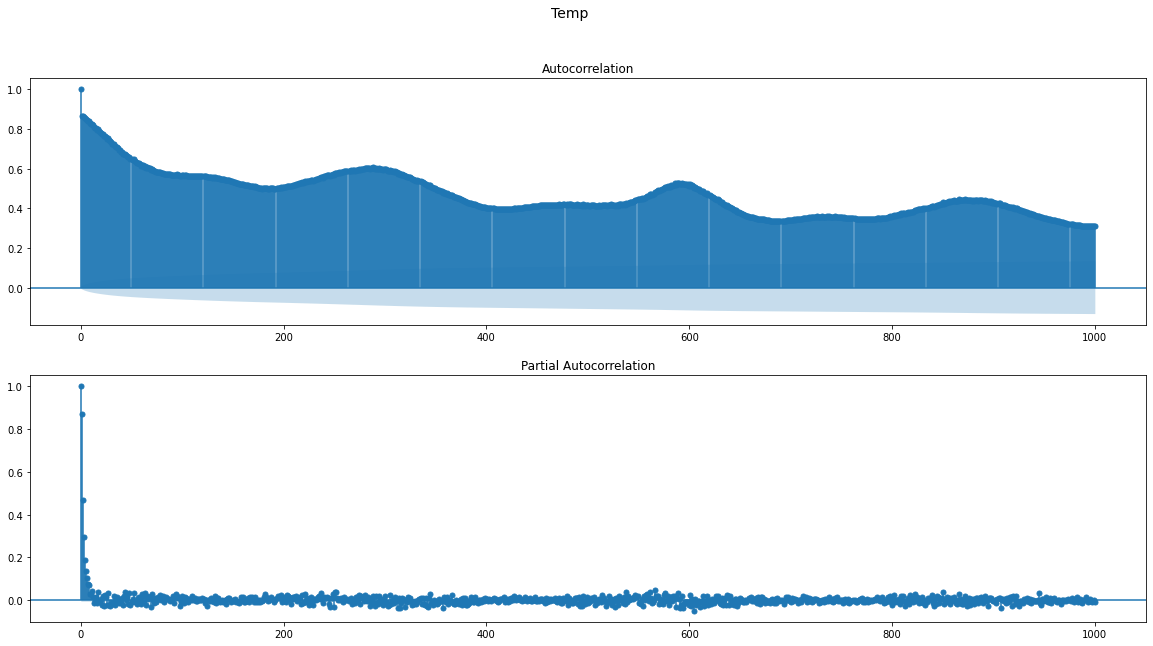

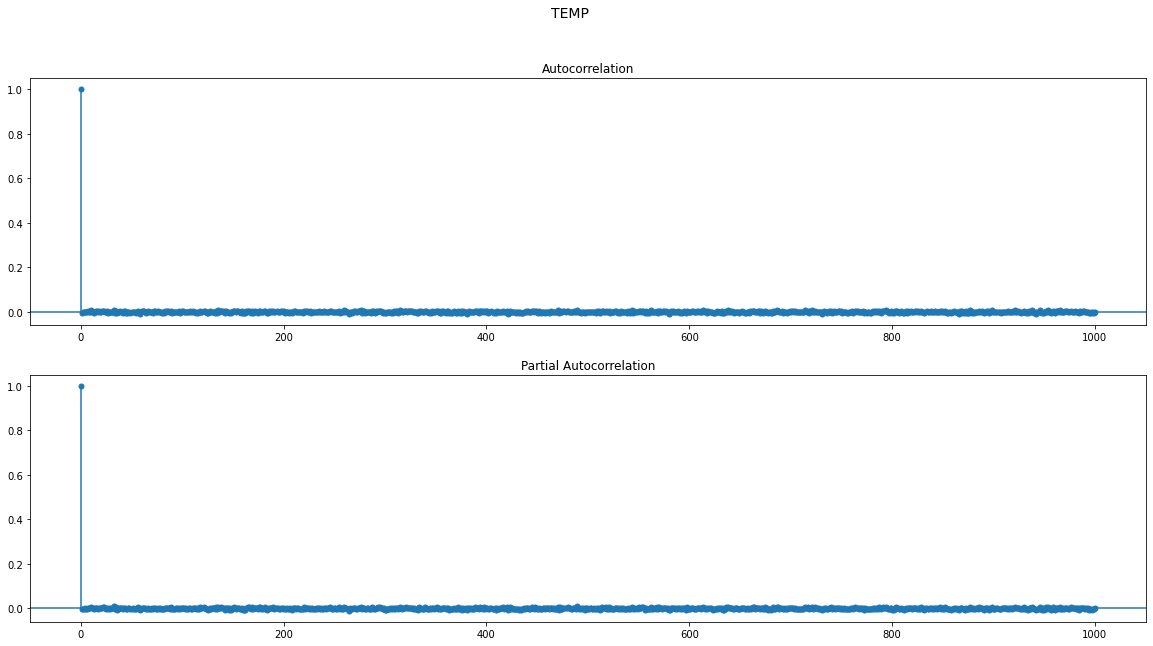

In [ ]:
import statsmodels.graphics.tsaplots as tsaplots
for col in df.columns:   
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
    tsaplots.plot_acf(df[col][0:100000], lags = 1000, ax=axes[0])
    tsaplots.plot_pacf(df[col][0:100000], lags= 1000, ax=axes[1])
    plt.suptitle(col, fontsize=14)
    plt.show()

In [ ]:
mod = sm.tsa.VARMAX(df, order=(10,10))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


#LSTM Encoder

In [3]:
# Set up GPU memory growth
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

In [4]:
def generate_input_output_pairs(data, time_steps, target_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps - target_steps + 1):
        X.append(data[i:i+time_steps,:])
        y.append(data[i+time_steps:i+time_steps+target_steps,:])
    return np.array(X), np.array(y)

In [7]:
data = pd.read_csv('/content/drive/MyDrive/data/dataTS.csv', 
                   usecols = ['Time', 'pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'], index_col= 'Time', parse_dates=['Time']).reindex(columns=['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'])
# data["Date_time"] = data.index.strftime('%H:%M:%S')
# data["Month"] = data.index.month
# data["Day"] = data.index.day
# for colname in data.select_dtypes(["object", "category"]):
#     data[colname], _ = data[colname].factorize()
data_train, data_test = train_test_split(
    data[-4000:], test_size= 100, shuffle=False)
data_train, data_val = train_test_split(
    data_train[-4000:], test_size= 100, shuffle=False)

In [8]:
X_train, y_train = generate_input_output_pairs(data_train.values, time_steps=20, target_steps=10)
X_val, y_val = generate_input_output_pairs(data_val.values, time_steps=20, target_steps=10)
X_test, y_test = generate_input_output_pairs(data_test.values, time_steps=20, target_steps=10)

In [9]:
num_features = 9
time_steps = 20
target_steps = 10

In [15]:
# Define autoencoder model
input_layer = tf.keras.layers.Input(shape=(time_steps, num_features))
encoder = tf.keras.layers.LSTM(16, activation='relu')(input_layer)
# encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.RepeatVector(target_steps)(encoder)
# decoder = tf.keras.layers.LSTM(64, activation='relu', return_sequences=True)(encoder)
decoder = tf.keras.layers.LSTM(32, activation='relu', return_sequences=True)(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.LSTM(64, activation='relu', return_sequences=True)(decoder)
output_layer = tf.keras.layers.TimeDistributed(Dense(num_features))(decoder)
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 9)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 16)                1664      
                                                                 
 repeat_vector_1 (RepeatVect  (None, 10, 16)           0         
 or)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 10, 32)            6272      
                                                                 
 dropout_1 (Dropout)         (None, 10, 32)            0         
                                                                 
 lstm_5 (LSTM)               (None, 10, 64)            24832     
                                                           

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit([X_train], [y_train],
                    validation_data=([X_val], [y_val]), 
                          batch_size=64, 
                          epochs=50, 
                          verbose=1, callbacks=[callback])

Epoch 1/50
59/59 [==============================] - 15s 79ms/step - loss: 18294.1602 - val_loss: 17683.8320
Epoch 2/50
59/59 [==============================] - 4s 75ms/step - loss: 14681.4746 - val_loss: 12687.2686
Epoch 3/50
59/59 [==============================] - 6s 97ms/step - loss: 12246.0889 - val_loss: 3177.7468
Epoch 4/50
59/59 [==============================] - 4s 70ms/step - loss: 10145.6143 - val_loss: 7450.3594
Epoch 5/50
59/59 [==============================] - 5s 86ms/step - loss: 9058.9248 - val_loss: 7153.5024
Epoch 6/50
59/59 [==============================] - 5s 86ms/step - loss: 7411.7085 - val_loss: 3499.7500
Epoch 7/50
59/59 [==============================] - 4s 70ms/step - loss: 6469.3945 - val_loss: 3053.5657
Epoch 8/50
59/59 [==============================] - 8s 129ms/step - loss: 5859.3818 - val_loss: 3017.4802
Epoch 9/50
59/59 [==============================] - 5s 82ms/step - loss: 5877.9004 - val_loss: 2516.3318
Epoch 10/50
59/59 [============================

In [17]:
y_pred = model.predict(X_test)
np.save('lstm_autoencoder.npy', y_pred)

3/3 [==============================] - 0s 9ms/step


**Dùng 4000 điểm dữ liệu**

In [18]:
from sklearn.metrics import mean_absolute_error
for i,j in zip(range(9),['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']):
  print(j,' RMSE ',mean_squared_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i], squared = False))
  print(j,' MAE ',mean_absolute_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i]))

pH  RMSE  5.648696589788679
pH  MAE  5.3158519695040205
DO  RMSE  4.599539837865231
DO  MAE  3.6647171988504033
TSS  RMSE  111.65724587601086
TSS  MAE  90.86684142707219
TN  RMSE  3.1161999198525385
TN  MAE  2.2869452567864776
TP  RMSE  61.91102261108117
TP  MAE  46.53017610563423
TOC  RMSE  11.201813482916553
TOC  MAE  8.978998975112814
ORP  RMSE  97.95536009701803
ORP  MAE  80.15899535531058
Temp  RMSE  7.29704063053837
Temp  MAE  6.1388593691973625
TEMP  RMSE  9.546650639006781
TEMP  MAE  7.843070054257623


**Dùng cả tập dữ liệu**

In [ ]:
from sklearn.metrics import mean_absolute_error
for i,j in zip(range(9),['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']):
  print(j,' RMSE ',mean_squared_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i], squared = False))
  print(j,' MAE ',mean_absolute_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i]))

pH  RMSE  5.423674159755777
pH  MAE  5.411587905937517
DO  RMSE  1.8512473417100144
DO  MAE  1.8413144986864545
TSS  RMSE  107.21239090418428
TSS  MAE  90.17222433197227
TN  RMSE  1.7302506333379484
TN  MAE  1.4155194482688918
TP  RMSE  58.86221190422065
TP  MAE  44.71279719836688
TOC  RMSE  9.453602305992604
TOC  MAE  7.589449167124773
ORP  RMSE  68.67366176846969
ORP  MAE  67.51906700284715
Temp  RMSE  1.215736257521685
Temp  MAE  1.0554506845608564
TEMP  RMSE  4.148120436254586
TEMP  MAE  3.4526979645846367


#Conv

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input
from tensorflow.keras.layers import concatenate

In [ ]:
# Xây dựng mô hình convolution dilated
def build_dilated_cnn_model(n_timesteps, n_features, dilation_rates=[1, 2, 4, 8], n_filters=32, kernel_size=3, dropout_rate=0.2):
    # Đầu vào mô hình
    inputs = Input(shape=(n_timesteps, n_features))

    # Áp dụng các lớp Conv1D với dilation_rates khác nhau
    x = inputs
    for dilation_rate in dilation_rates:
        x = Conv1D(filters=n_filters, kernel_size=kernel_size, dilation_rate=dilation_rate, activation='relu', padding='causal')(x)
        x = tf.keras.layers.Dropout(rate=dropout_rate)(x)
    
    # Đầu ra mô hình
    x = Conv1D(filters=9, kernel_size=11, activation='linear')(x)
    outputs = Conv1D(filters=9, kernel_size=1, activation='linear')(x)

    # Đóng gói mô hình
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Chuẩn bị dữ liệu và huấn luyện mô hình
# ... (code bổ sung ở đây)

# Xây dựng mô hình
model = build_dilated_cnn_model(n_timesteps=20, n_features=9)

# Biên dịch mô hình và huấn luyện với dữ liệu
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 9)]           0         
                                                                 
 conv1d (Conv1D)             (None, 20, 32)            896       
                                                                 
 dropout_3 (Dropout)         (None, 20, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 32)            3104      
                                                                 
 dropout_4 (Dropout)         (None, 20, 32)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 20, 32)            3104      
                                                                 
 dropout_5 (Dropout)         (None, 20, 32)            0   

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, epochs=50, verbose =1, batch_size=64, validation_data=(X_val, y_val),
          callbacks=[callback])

Epoch 1/50
5300/5300 [==============================] - 42s 7ms/step - loss: 2420.7871 - val_loss: 3193.7959
Epoch 2/50
5300/5300 [==============================] - 34s 6ms/step - loss: 2120.4294 - val_loss: 3097.1938
Epoch 3/50
5300/5300 [==============================] - 35s 7ms/step - loss: 2082.2517 - val_loss: 3213.1382
Epoch 4/50
5300/5300 [==============================] - 34s 6ms/step - loss: 2055.7629 - val_loss: 3311.8821
Epoch 5/50
5300/5300 [==============================] - 34s 6ms/step - loss: 2036.9978 - val_loss: 2832.9502
Epoch 6/50
5300/5300 [==============================] - 35s 7ms/step - loss: 2031.4802 - val_loss: 3162.1284
Epoch 7/50
5300/5300 [==============================] - 35s 7ms/step - loss: 2016.1965 - val_loss: 3276.3147
Epoch 8/50
5300/5300 [==============================] - 34s 6ms/step - loss: 2010.5817 - val_loss: 2998.7244
Epoch 9/50
5300/5300 [==============================] - 34s 6ms/step - loss: 2000.9070 - val_loss: 2766.7400
Epoch 10/50
5300/53

In [ ]:
y_pred = model.predict(X_test)
np.save('conv.npy', y_pred)

3/3 [==============================] - 0s 6ms/step


In [ ]:
for i,j in zip(range(9),['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']):
  print(j,' RMSE ',mean_squared_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i], squared = False))
  print(j,' MAE ',mean_absolute_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i]))

pH  RMSE  5.345919498882092
pH  MAE  5.343097693537323
DO  RMSE  1.751847217844716
DO  MAE  1.7476846744107526
TSS  RMSE  111.08934915499685
TSS  MAE  90.48458671568007
TN  RMSE  1.7389659408696063
TN  MAE  1.4294872393748677
TP  RMSE  58.9336285812389
TP  MAE  44.398871493029326
TOC  RMSE  9.368880260585938
TOC  MAE  7.522571075434134
ORP  RMSE  115.01081607847212
ORP  MAE  114.9723945793904
Temp  RMSE  1.1237961637416882
Temp  MAE  0.8703334940520813
TEMP  RMSE  4.148031988881101
TEMP  MAE  3.460652473762548


#Conv1D + skip_connection

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Dropout, Dense, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Xây dựng mô hình convolution dilated với skip connection
def build_dilated_cnn_model(n_timesteps, n_features, dilation_rates=[1, 2, 4], n_filters=32, kernel_size=3, dropout_rate=0.2):
    # Đầu vào mô hình
    inputs = Input(shape=(n_timesteps, n_features))

    # Áp dụng các lớp Conv1D với dilation_rates khác nhau và skip connection
    skip_connections = []
    
    x = tf.keras.layers.Reshape((n_timesteps * n_features,))(inputs)
    # Dense layer to remove trend
    trend = Dense(1, activation='linear')(x)
    # trend = tf.keras.layers.Reshape((1, 1))(x)
    # Reshape input
    x = inputs
    
    for dilation_rate in dilation_rates:
      x = Conv1D(filters=n_filters, kernel_size=kernel_size, dilation_rate=dilation_rate, activation='relu', padding='causal')(x)
      x = tf.keras.layers.Dropout(rate=dropout_rate)(x)

    # Đầu ra mô hình
    outputs = Conv1D(filters=9, kernel_size=11, activation='linear')(x)

    outputs = Add()([outputs, trend])

    # Đóng gói mô hình
    model = Model(inputs=inputs, outputs=outputs)
    return model
model = build_dilated_cnn_model(n_timesteps=20, n_features=9)

# Biên dịch mô hình và huấn luyện với dữ liệu
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 20, 9)]      0           []                               
                                                                                                  
 conv1d_11 (Conv1D)             (None, 20, 32)       896         ['input_5[0][0]']                
                                                                                                  
 dropout_10 (Dropout)           (None, 20, 32)       0           ['conv1d_11[0][0]']              
                                                                                                  
 conv1d_12 (Conv1D)             (None, 20, 32)       3104        ['dropout_10[0][0]']             
                                                                                            

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, epochs=50, verbose =1, batch_size=256, validation_data=(X_val, y_val),
          callbacks=[callback])

Epoch 1/50
1325/1325 [==============================] - 12s 7ms/step - loss: 3898.6970 - val_loss: 1915.9551
Epoch 2/50
1325/1325 [==============================] - 9s 6ms/step - loss: 2133.2346 - val_loss: 1958.0674
Epoch 3/50
1325/1325 [==============================] - 8s 6ms/step - loss: 2074.6184 - val_loss: 2165.4536


In [ ]:
y_pred = model.predict(X_test)
np.save('conv_trend.npy', y_pred)

3/3 [==============================] - 0s 6ms/step


In [ ]:
for i,j in zip(range(9),['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']):
  print(j,' RMSE ',mean_squared_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i], squared = False))
  print(j,' MAE ',mean_absolute_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i]))

pH  RMSE  6.397928498622013
pH  MAE  6.1523552329909625
DO  RMSE  9.687278721323347
DO  MAE  9.520252007282956
TSS  RMSE  107.17742459677221
TSS  MAE  89.27987547799091
TN  RMSE  11.9528571634446
TN  MAE  11.688366589453452
TP  RMSE  59.3269602531356
TP  MAE  45.86848895523008
TOC  RMSE  13.429355981840514
TOC  MAE  11.242512567363471
ORP  RMSE  66.46335502782833
ORP  MAE  66.30774016732228
Temp  RMSE  10.21916416067152
Temp  MAE  10.070102858422507
TEMP  RMSE  9.398135921437953
TEMP  MAE  8.305148180746906


#Conv + LSTM 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Dropout, Dense, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Xây dựng mô hình convolution dilated với skip connection
def build_cnn_lstm_model(n_timesteps, n_features, n_targetstep, n_filters=32, kernel_size=6, dropout_rate=0.2):
    # Đầu vào mô hình
    inputs = Input(shape=(n_timesteps, n_features))
    
    x = tf.keras.layers.Reshape((n_timesteps * n_features,))(inputs)
    # Dense layer to remove trend
    trend = Dense(1, activation='linear')(x)
    # trend = tf.keras.layers.Reshape((1, 1))(x)
    # Reshape input
    x = inputs
    
    x = Conv1D(filters=64, kernel_size=kernel_size, activation='relu', padding='causal')(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate)(x)
    x = Conv1D(filters=32, kernel_size=kernel_size, activation='relu', padding='causal')(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate)(x)
    outputs_cnn = Conv1D(filters=9, kernel_size=11, activation='linear')(x)
    # Đầu ra mô hình
    outputs = tf.keras.layers.LSTM(n_features, activation='relu', input_shape = (n_targetstep, n_features), return_sequences= True)(outputs_cnn)
    

    outputs = Add()([outputs, trend])

    # Đóng gói mô hình
    model = Model(inputs=inputs, outputs=outputs)
    return model
model = build_cnn_lstm_model(n_timesteps = 20, n_features = 9, n_targetstep = 10, n_filters=32, kernel_size=6, dropout_rate=0.2)

# Biên dịch mô hình và huấn luyện với dữ liệu
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 20, 9)]      0           []                               
                                                                                                  
 conv1d_21 (Conv1D)             (None, 20, 64)       3520        ['input_8[0][0]']                
                                                                                                  
 dropout_17 (Dropout)           (None, 20, 64)       0           ['conv1d_21[0][0]']              
                                                                                                  
 conv1d_22 (Conv1D)             (None, 20, 32)       12320       ['dropout_17[0][0]']             
                                                                                            

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, epochs=50, verbose =1, batch_size=256, validation_data=(X_val, y_val),
          callbacks=[callback])

Epoch 1/50
1325/1325 [==============================] - 58s 41ms/step - loss: 6756.4673 - val_loss: 1742.1305
Epoch 2/50
1325/1325 [==============================] - 39s 30ms/step - loss: 4291.7236 - val_loss: 1654.8805
Epoch 3/50
1325/1325 [==============================] - 43s 32ms/step - loss: 4124.8716 - val_loss: 1691.8424
Epoch 4/50
1325/1325 [==============================] - 39s 29ms/step - loss: 4055.0874 - val_loss: 1664.2728


In [ ]:
y_pred = model.predict(X_test)
np.save('LSTNet.npy', y_pred)

3/3 [==============================] - 0s 18ms/step


In [ ]:
for i,j in zip(range(9),['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']):
  print(j,' RMSE ',mean_squared_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i], squared = False))
  print(j,' MAE ',mean_absolute_error(y_pred.reshape(-1,9)[:,i], y_test.reshape(-1,9)[:,i]))

pH  RMSE  5.681031074514573
pH  MAE  5.198396109137736
DO  RMSE  9.796177578682224
DO  MAE  9.528860897870132
TSS  RMSE  108.82853483891188
TSS  MAE  89.3959450859925
TN  RMSE  14.342146787973963
TN  MAE  14.083307435856332
TP  RMSE  59.45940147522474
TP  MAE  46.673613348263366
TOC  RMSE  9.55051112680255
TOC  MAE  7.728190129909204
ORP  RMSE  6.643038079488349
ORP  MAE  5.574084713358274
Temp  RMSE  6.64812333122163
Temp  MAE  6.028128806208222
TEMP  RMSE  7.090273344959891
TEMP  MAE  5.886474043398999
